In [12]:
import os
import io
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr



In [3]:
data_folder= "NDVI_DATA_"

ndvi2005_data = xr.open_mfdataset(os.path.join(data_folder,'2005','AVHRR-Land_v005_AVH13C1_NOAA-16_*.nc'),concat_dim='time',
combine='nested'
)['NDVI']
ndvi1985_data = xr.open_mfdataset(os.path.join(data_folder,'1985','AVHRR-Land_v005_AVH13C1_NOAA-09_*.nc'),concat_dim='time',
combine='nested'
)['NDVI']

C:\Users\Tanmayi\anaconda3\Lib\site-packages\xarray\coding\times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
C:\Users\Tanmayi\anaconda3\Lib\site-packages\xarray\coding\times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
C:\Users\Tanmayi\anaconda3\Lib\site-packages\xarray\coding\times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
C:\Users\Tanmayi\anaconda3\Lib\site-packages\xarray\coding\times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
C:\Users\Tanmayi\anaconda3\Lib\site-packages\xarray\coding\times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]

In [4]:
ndvi2005_data=ndvi2005_data.compute()
mean_ndvi_2005=ndvi2005_data.mean(dim='time',skipna=True).compute()
std_dev_ndvi_2005=ndvi2005_data.std(dim='time',skipna=True).compute()
n1=len(ndvi2005_data.time)
del ndvi2005_data
n1

77

In [5]:
ndvi1985_data=ndvi1985_data.compute()
mean_ndvi_1985=ndvi1985_data.mean(dim='time',skipna=True).compute()
std_dev_ndvi_1985=ndvi1985_data.std(dim='time',skipna=True).compute()
n2=len(ndvi1985_data.time)
del ndvi1985_data
n2

93

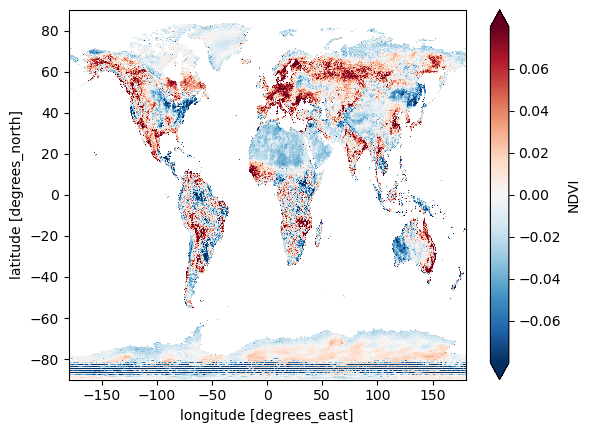

In [8]:
(mean_ndvi_2005-mean_ndvi_1985).plot(robust=True)

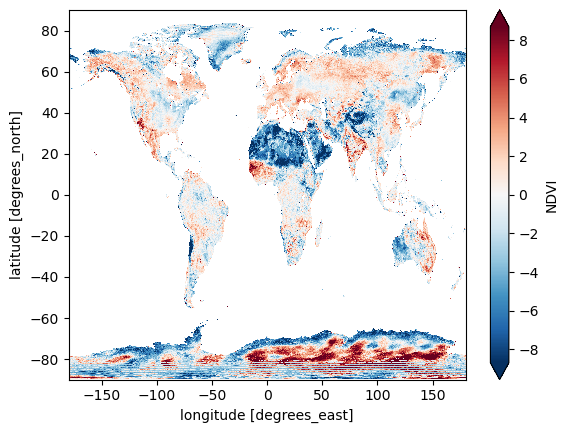

In [9]:
Sp=np.sqrt((std_dev_ndvi_2005**2*(n1-1)+std_dev_ndvi_1985**2*(n2-1))/(n1+n2-2))
t=((mean_ndvi_2005-mean_ndvi_1985)/(Sp*(1/n1+1/n2)**0.5)).compute()
t.plot(robust=True)

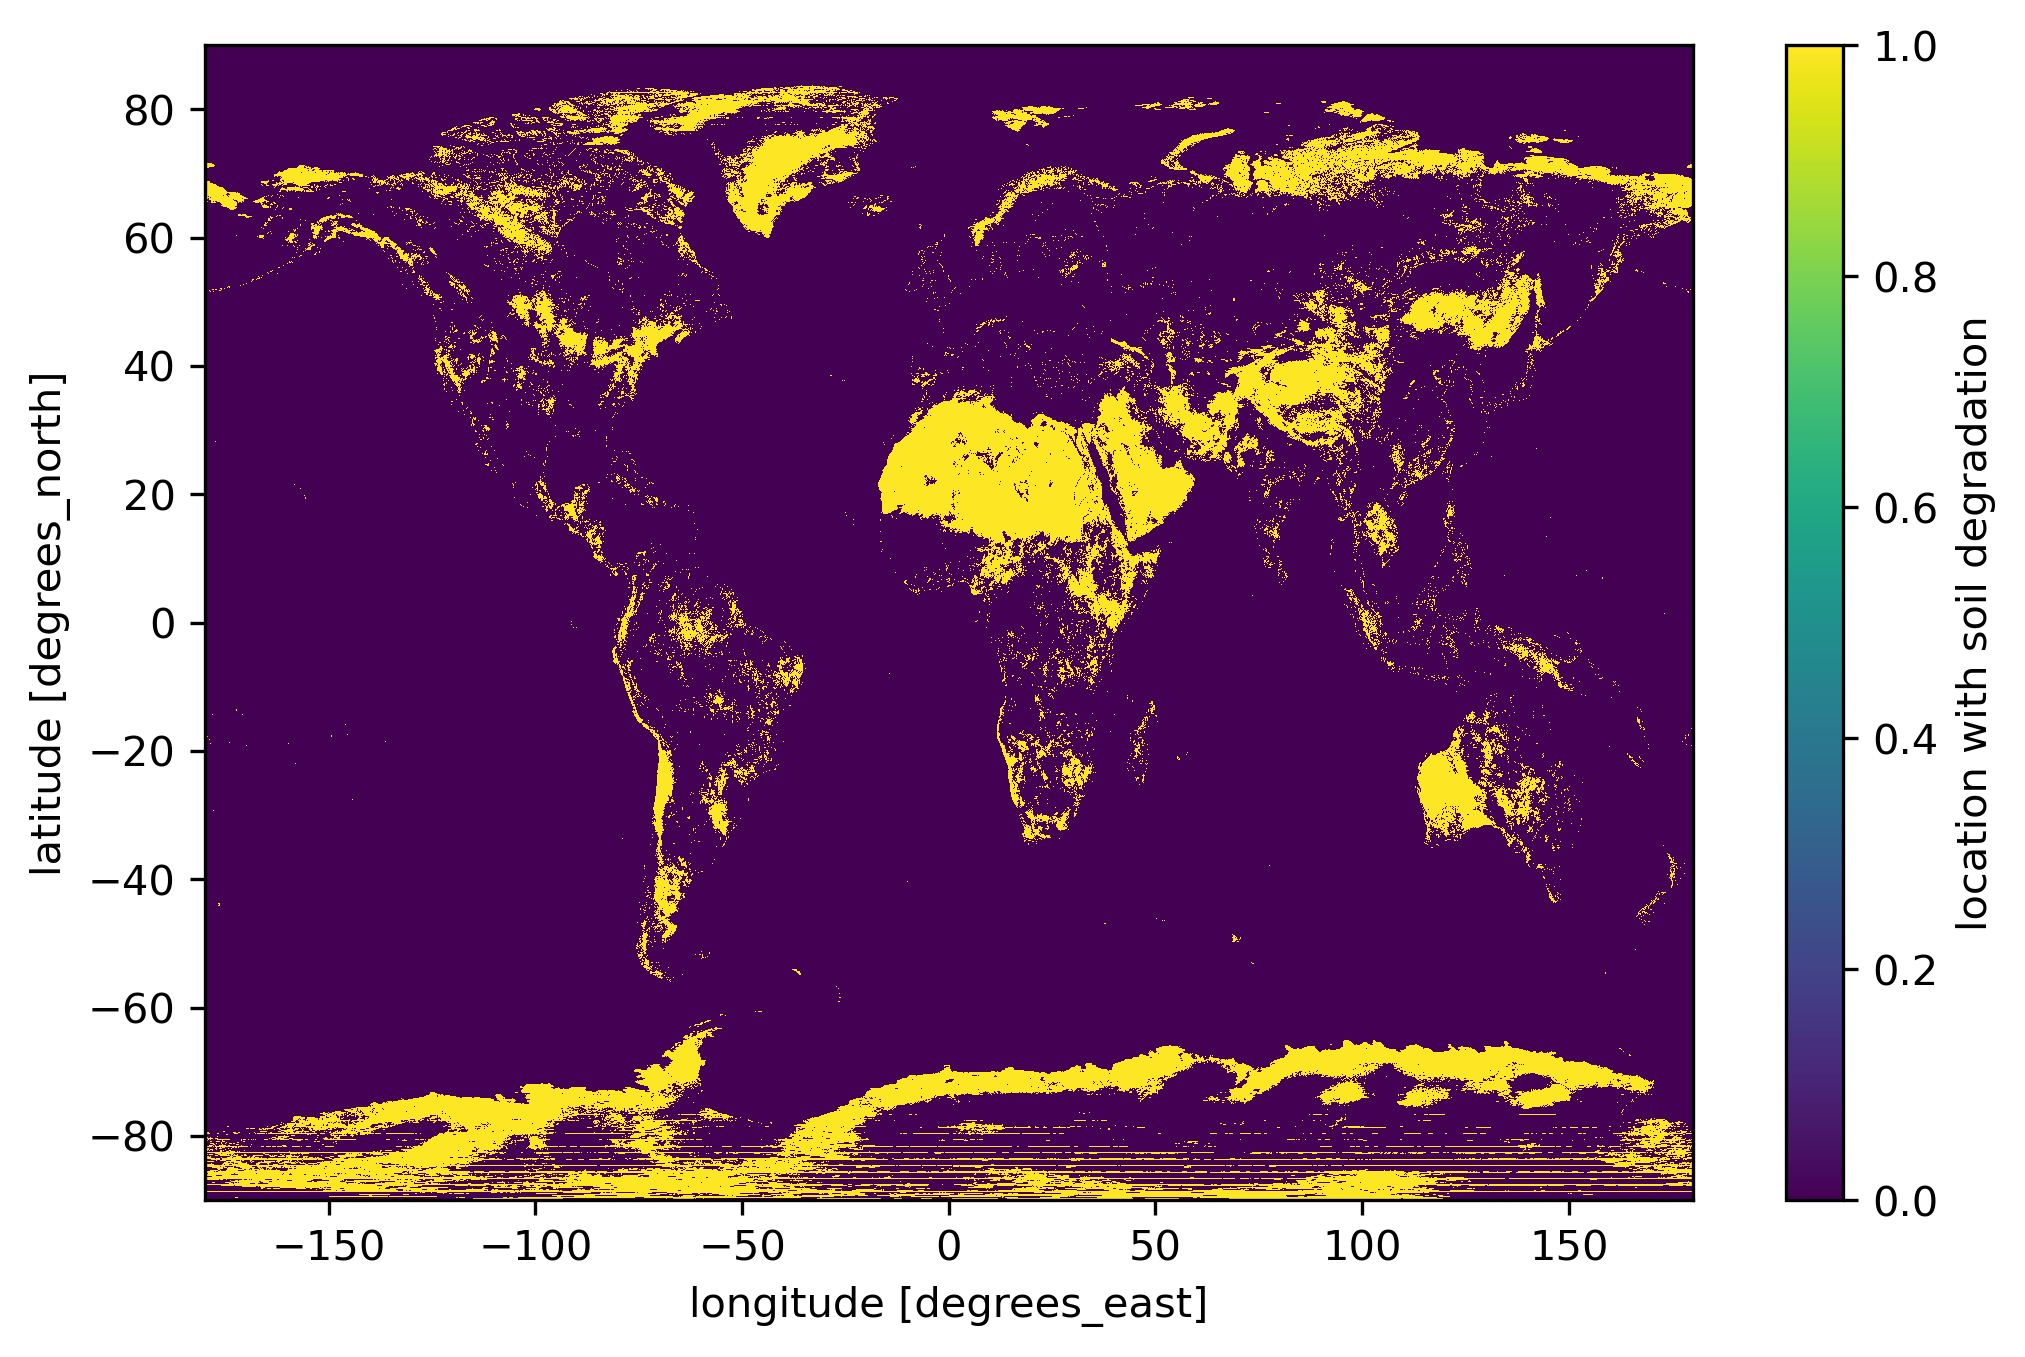

In [15]:
critical_t_value=stats.t.ppf(0.05,n1+n2-2)
location_with_soil_degradation=(t<critical_t_value)
fig,axs=plt.subplots(nrows=1,ncols=1,figsize=[8,5],dpi=300)
location_with_soil_degradation.name='location with soil degradation'
location_with_soil_degradation.plot(ax=axs)
fig.savefig('location_degradation.png')0